# Working with Stock Data

In [1]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import pandas_datareader.data as web
%matplotlib inline

style.use('ggplot') # Set style

In [2]:
df = pd.read_csv('Data/tsla.csv', parse_dates=True, index_col=0)

#### Create new column for Moving Average:
- MA smooths out price over time
- A 100-day MA would average out the closing prices for the first 100 days as the first data point. The next data point would drop the earliest price, add the price on day 101 and take the average


In [3]:
df['100ma'] = df['Adj Close'].rolling(window=100).mean()
#df['100ma'] = df['Adj Close'].rolling(window=100, min_periods=0).mean() - no NaN for first data points

In [4]:
#Fist 100 data point would be NaN
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2010-06-29,19.000000,25.00,17.540001,23.889999,23.889999,18766300,NaN
2010-06-30,25.790001,30.42,23.299999,23.830000,23.830000,17187100,NaN
2010-07-01,25.000000,25.92,20.270000,21.959999,21.959999,8218800,NaN
2010-07-02,23.000000,23.10,18.709999,19.200001,19.200001,5139800,NaN
2010-07-06,20.000000,20.00,15.830000,16.110001,16.110001,6866900,NaN


In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2017-11-13,300.130005,316.799988,299.109985,315.399994,315.399994,7584900,343.643399
2017-11-14,315.000000,316.350006,306.899994,308.700012,308.700012,5676100,342.895899
2017-11-15,306.010010,312.489990,301.500000,311.299988,311.299988,5978700,342.233999
2017-11-16,313.989990,318.140015,311.299988,312.500000,312.500000,5822100,341.735299
2017-11-17,325.670013,326.670013,313.149994,315.049988,315.049988,13703600,341.173399


#### Can drop rows with Nan (no MA)

In [6]:
df.dropna(inplace=True) #Same as: df = df.dropna
df.head()

,Open,High,Low,Close,Adj Close,Volume,100ma
Date,,,,,,,
2010-11-17,30.200001,30.750000,28.610001,29.490000,29.490000,750000,20.9879
2010-11-18,30.670000,30.740000,28.920000,29.889999,29.889999,956100,21.0479
2010-11-19,30.160000,31.370001,29.700001,30.990000,30.990000,1150500,21.1195
2010-11-22,31.570000,33.450001,31.500000,33.400002,33.400002,1529700,21.2339
2010-11-23,33.290001,35.680000,32.189999,34.570000,34.570000,1577800,21.3876


#### Save new df with Moving Average as a csv file 

In [7]:
df.to_csv('Data/tsla2.csv')

## Plot new data with matplotlib:
- Using subplots, 6rows x 1column
- 2 main graphs:
    - Adj Close and 100ma on one graph (5rows x 1column)
    - Volume on second graph (1row x 1column)

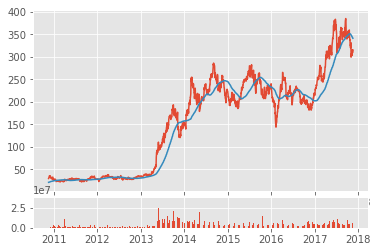

In [8]:
ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1) 
#sharex=ax1 - zooming in on one plots, zooms the other

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

#### Switch to interactive plot

In [10]:
%matplotlib

ax1 = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
ax2 = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=ax1) 
#sharex=ax1 - zooming in on one plots, zooms the other

ax1.plot(df.index, df['Adj Close'])
ax1.plot(df.index, df['100ma'])
ax2.bar(df.index, df['Volume'])

plt.show()

Using matplotlib backend: Qt5Agg
